In [1]:
import DirectDmTargets as dddm

calculating effective efficiency for Xe detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Ge detector done


In [2]:
import corner

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import os

In [27]:
results = {}
for i in range(200):
    try:
        results[i] = dddm.load_nestle_samples(i)
        print()
    except FileNotFoundError:
        pass
#         print(f"No result for {i}")
#     print()

loading results/test_nestle0/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

loading results/test_nestle1/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

loading results/test_nestle2/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

loading results/test_nestle3/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

loading results/test_nestle4/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

loading results/test_nestle5/
load_nestle_sam

In [28]:
results.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [74]:
selected_keys = []
for i in results.keys():
    if 'long' in results[i]['config']['notes']:
#         print(i, ",")
        selected_keys.append(i)
selected_keys

[12, 13, 14, 15, 16, 17]

In [75]:
results[0]['samples']

array([[  1.94161244, -42.01784097],
       [  1.78089798, -42.22912645],
       [  2.00098088, -42.50820779],
       ...,
       [  1.38977268, -44.95542805],
       [  1.39380817, -44.97601324],
       [  1.39305188, -44.96842112]])

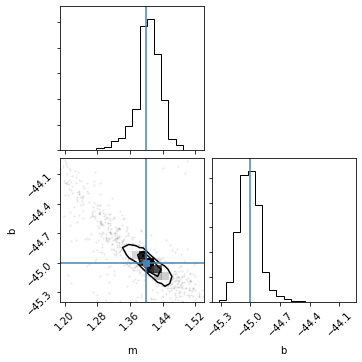

In [76]:
fig = corner.corner(results[0]['samples'], weights = results[0]['weights'], labels=['m', 'b'],
                    range=[0.99999, 0.99999], truths=[
                    results[0]['config']['mw'],
                    results[0]['config']['sigma']], 
#                     bins=30
                   )
plt.show()

---12---
12049 2
(12049, 2)
(12049,)


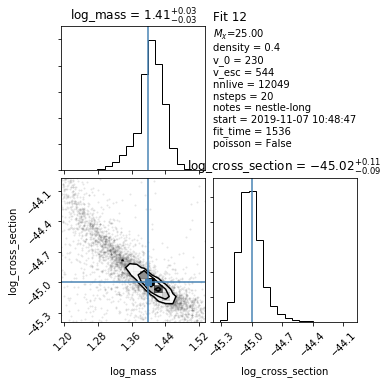

---13---
8742 2
(8742, 2)
(8742,)


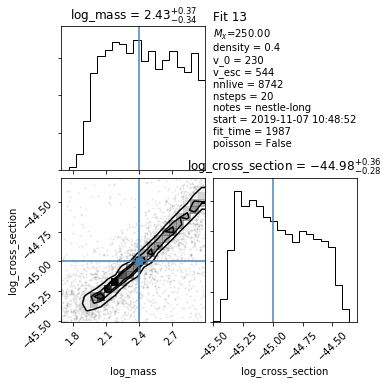

---14---
11350 2
(11350, 2)
(11350,)


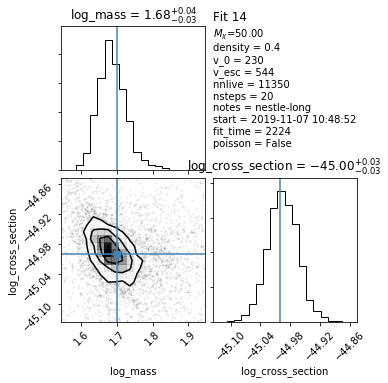

---15---
12061 5
(12061, 5)
(12061,)


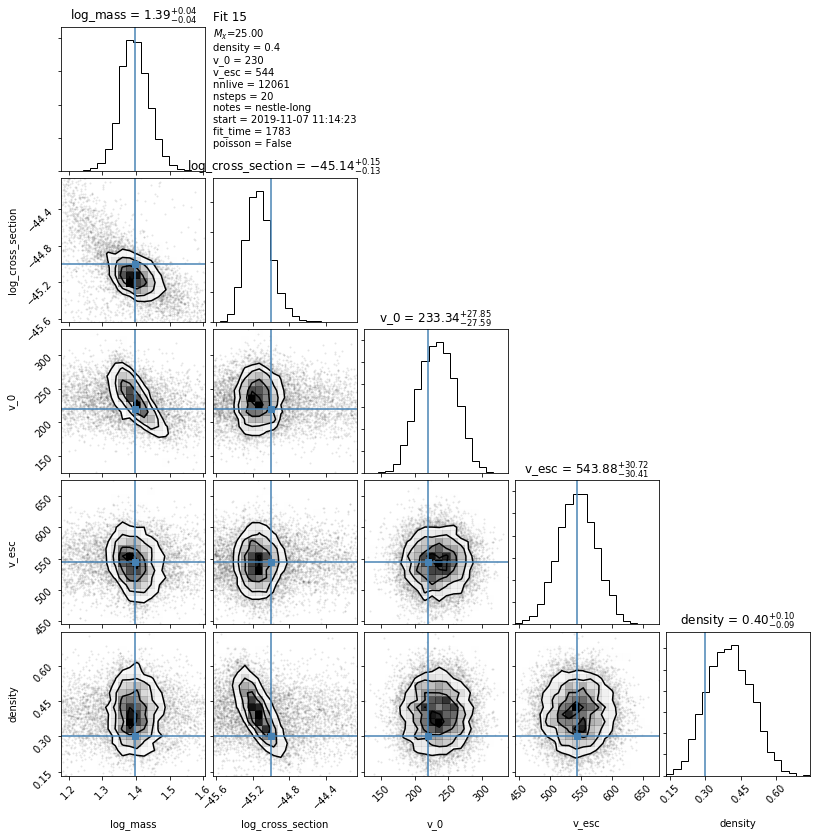

---16---
8954 5
(8954, 5)
(8954,)


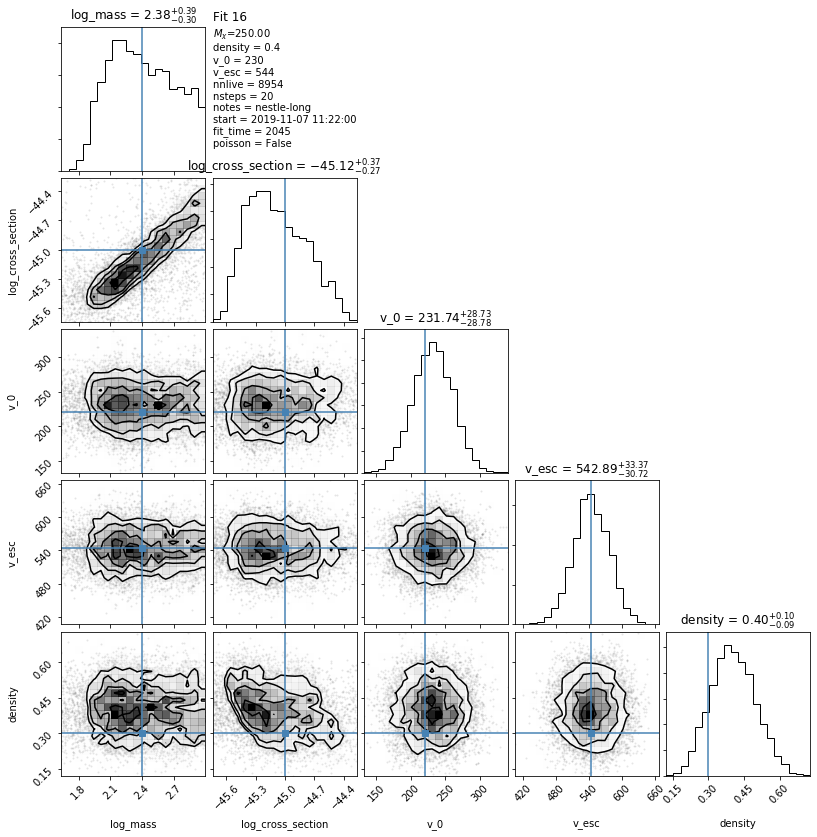

---17---
11389 5
(11389, 5)
(11389,)


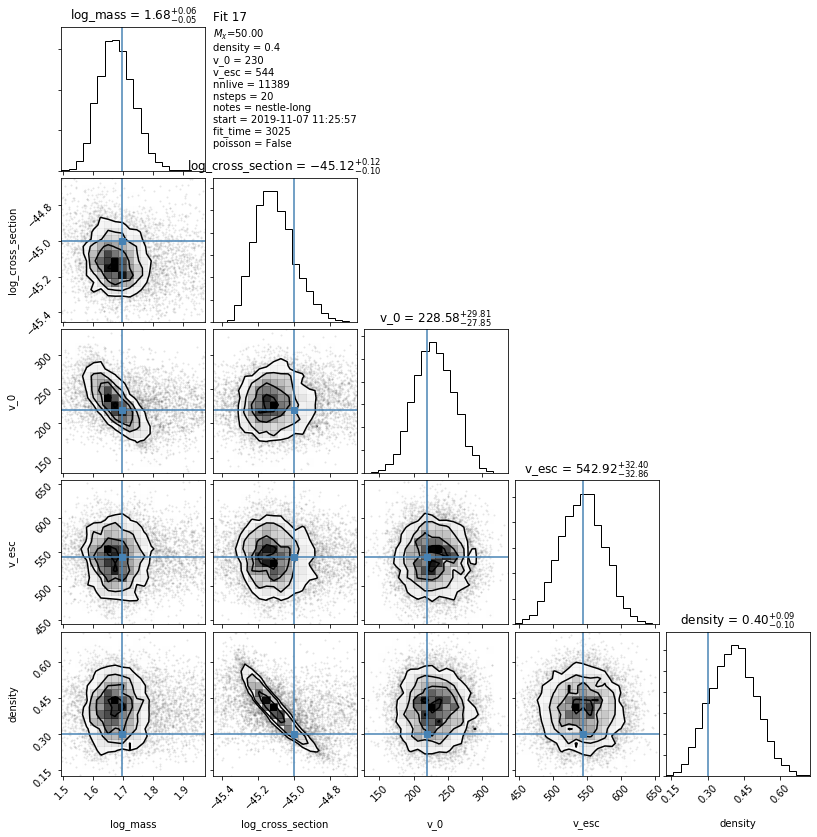

In [103]:
# for key in results.keys():
for key in selected_keys:
    print(f"---{key}---")
    result = results[key]
    try:       
        info = "$M_\chi}$=%.2f"%10 ** np.float(result['config']['mw'])
        for prior_key in result['config']['prior'].keys():
            try:
                mean = result['config']['prior'][prior_key]['mean']
                info += f"\n{prior_key} = {mean}"
            except KeyError:
                pass
         
        nlive, ndim = np.shape(result['samples'])
        
#         info += "\npoisson = %s"%result['config']['poisson']   
        info += "\nnnlive = %s"%nlive
        info += "\nnsteps = %s"%nsteps
        for str_inf in ['notes', 'start', 'fit_time', 'poisson']:
            try: 
                info += f"\n{str_inf} = %s"%result['config'][str_inf]
                if str_inf is 'start':
                    info = info[:-7]
            except KeyError:
                pass
#         labels = ['log_mass',
#                         'log_cross_section',
#                         'v_0',
#                         'v_esc',
#                         'density'][:ndim]
        labels = ['log_mass',
                        'log_cross_section',
                        'v_0',
                        'v_esc',
                        'density'][:ndim]
        truths = [result['config']['mw'],
                  result['config']['sigma'],
                  result['config']['v_0'],
                  result['config']['v_esc'],
                  result['config']['rho_0']
                  ][:ndim]
        
#         fig, axes = plt.subplots(len(labels), figsize=(10, 5), sharex=True)
#         samples = result['full_chain']
#         for i in range(len(labels)):
#             ax = axes[i]
#             ax.plot(samples[:, :, i], "k", alpha=0.3)
#             ax.axhline(truths[i])
#             ax.set_xlim(0, len(samples))
#             ax.set_ylabel(labels[i])
#             ax.yaxis.set_label_coords(-0.1, 0.5)
            
#         axes[-1].set_xlabel("step number")
#         plt.savefig(f"results/test_emcee{key}/walkers{key}.png", dpi = 200)
#         plt.show()
        print(nlive, ndim )
        print(np.shape(result['samples'])) 
        print(np.shape(result['weights']))
        fig = corner.corner(result['samples'], 
                            weights = result['weights'], 
                            labels=labels,
                    range=[0.99999, 0.99999, 0.99999, 0.99999, 0.99999][:ndim], 
                            truths=truths, 
                            show_titles = True
#                     bins=30
                   )
#         plt.show()
#         fig= corner.corner(result['flat_chain'],
#                             labels = labels,
#                             truths = truths,
# #                             quantiles=[0.05, 0.5, 0.95],
#                            show_titles=True
#                            );
#         fig.suptitle(f"Fit {key}\n\n\n")
        fig.axes[1].set_title(f"Fit {key}", loc = 'left')
        fig.axes[1].text(0,1,info, verticalalignment = 'top')
        plt.savefig(f"results/test_nestle{key}/corner{key}.png", dpi = 200)
        plt.show()
        
    except AssertionError:
        pass
#     except ValueError:
#         print(f"In one of the dimentions the walkers did not walk resulting in an empty range."
#               f"This is not good, delete threse results. Info\n{info}")

In [78]:
import multihist as mh

In [93]:
def get_posterior(samples, weights):
    # re-scale weights to have a maximum of one
    nweights = weights/np.max(weights)

    # get the probability of keeping a sample from the weights
    keepidx = np.where(np.random.rand(len(nweights)) < nweights)[0]
    # get the posterior samples
    return samples[keepidx,:]


In [ ]:
# np.shape(np.random.normal(1, 1, 10**6))

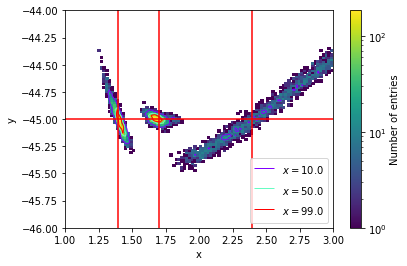

In [101]:
# Create and show a 2d histogram. Axis names are optional.
m2 = mh.Histdd(bins=100, range=[[1, 3], [-46, -44.0]], axis_names=['x', 'y'])
for i in [12, 13, 14]:
    m2.add(*get_posterior(results[i]['samples'], results[i]['weights']).T)
# m2.add(*results[13]['samples'].T)
# m2.add(*results[14]['samples'].T)
counts = m2.histogram
xbins, ybins = m2.bin_centers()
cont = plt.contour(counts.transpose(),
            extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, cmap = plt.cm.rainbow, levels = [10, 50, 99])

artists, labels = cont.legend_elements()
plt.legend(artists, labels, handleheight=2, loc = "lower right")

plt.axvline(np.log10(25), c = 'r')
plt.axvline(np.log10(50), c = 'r')
plt.axvline(np.log10(250), c = 'r')
plt.axhline(-45, c = 'r')
# m2.add(np.random.normal(-2, 1, 10**6), np.random.normal(2, 1, 10**6))
m2.plot(log_scale = True)

plt.show()

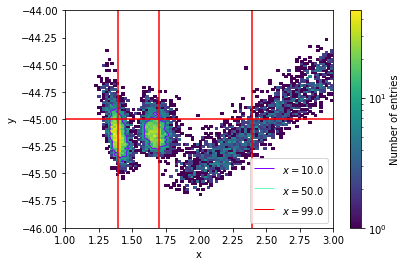

In [102]:
# Create and show a 2d histogram. Axis names are optional.
m2 = mh.Histdd(bins=100, range=[[1, 3], [-46, -44]], axis_names=['x', 'y'])
for i in [15, 16, 17]:
    m2.add(*get_posterior(results[i]['samples'], results[i]['weights']).T[:2])
# m2.add(*results[15]['samples'].T[:2])
# m2.add(*results[16]['samples'].T[:2])
# m2.add(*results[17]['samples'].T[:2])
counts = m2.histogram
xbins, ybins = m2.bin_centers()
cont = plt.contour(counts.transpose(),
            extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, cmap = plt.cm.rainbow, levels = [10, 50, 99])

artists, labels = cont.legend_elements()
plt.legend(artists, labels, handleheight=2, loc = "lower right")

plt.axvline(np.log10(25), c = 'r')
plt.axvline(np.log10(50), c = 'r')
plt.axvline(np.log10(250), c = 'r')
plt.axhline(-45, c = 'r')
# m2.add(np.random.normal(-2, 1, 10**6), np.random.normal(2, 1, 10**6))
m2.plot(log_scale = True)

plt.show()

In [ ]:
np.shape(m2.histogram)

In [ ]:
# plt.contour(results[25]['flat_chain'].T[:2], (0.5, 0.5))

In [ ]:
test = [            np.clip(
                #                 val + 0.001 * val * np.random.randn(self.nwalkers, 1),
                val + 0.25 * val * np.random.randn(10, 1),
                #                 val + 0.5 * val * np.abs(
                #                     np.random.randn(self.nwalkers, 1)),
                1. * 1,
                1. * 4)
            for i, val in enumerate([0,1,3,4,5])]

In [ ]:
np.shape(test)

In [ ]:
stack_test = np.hstack(test)
np.shape(stack_test)

In [ ]:
np.shape(np.random.randn(10, 1))

In [ ]:
np.shape(
 np.random.uniform(0, 10, (10,1))
)

In [ ]:
mtest = mh.Histdd(bins=100, range=[[0, 10], [0, 4]], axis_names=['x', 'y'])
x, y = np.random.uniform(1,3,1000), np.random.uniform(1,3,1000)
mtest.add(x, y)
mtest.plot()

In [ ]:
mtest.histogram

In [ ]:
np.shape(mtest.bin_centers())

In [ ]:
counts = mtest.histogram
xbins, ybins = mtest.bin_centers()
plt.contour(counts.transpose(),
            extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=3, cmap = plt.cm.rainbow, levels = [95])